# Dismissal Analysis

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
url = 'https://raw.githubusercontent.com/aswinshenoy/cricketminer/master/samples/virat_kohli_t20i.json'
data = requests.get(url).json()

In [11]:
dataset = pd.DataFrame(data)

### Dismissal Type

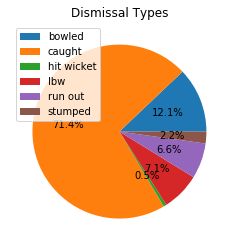

In [4]:
a = dataset.loc[~dataset['dismissalType'].isin({'not out','-'})]
b = a.groupby(by='dismissalType', as_index=False).size()
b.plot(kind='pie', title='Dismissal Types', autopct='%1.1f%%', legend=True, label='', labels=None)

### Dismissal Against

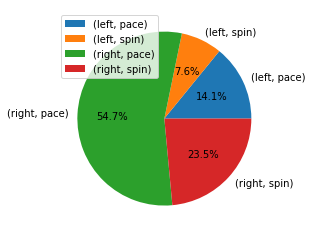

In [5]:
a = dataset.groupby(by=['dismissalBowlerHand','dismissedAgainst']).size()
a.plot(kind='pie', legend=True, autopct='%1.1f%%', label='')

### Runs Scored and Balls Faced When Dismissed

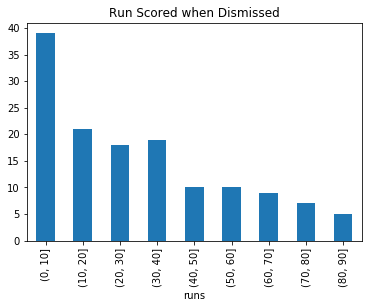

In [6]:
dismissed_matches = dataset.loc[~dataset['dismissalType'].isin({'not out','-'})]
grouped_data = dismissed_matches.groupby(pd.cut(dismissed_matches["runs"], np.arange(0, 100, 10))).size()
grouped_data.plot(kind='bar', title='Run Scored when Dismissed')

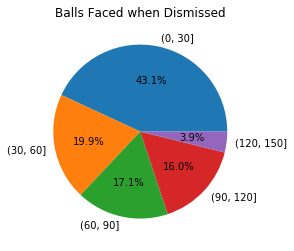

In [7]:
dismissed_matches = dataset.loc[~dataset['dismissalType'].isin({'not out','-'})]
grouped_data = dismissed_matches.groupby(pd.cut(dismissed_matches["balls"], np.arange(0, 180, 30))).size()
grouped_data.plot(kind='pie', autopct='%1.1f%%', label='', title='Balls Faced when Dismissed')

### Innings when dismissed

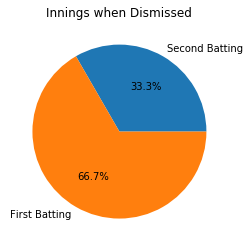

In [20]:
dismissed_matches = dataset.loc[~dataset['dismissalType'].isin({'not out','-'})]
grouped_data = dismissed_matches.groupby(dismissed_matches['firstBat']).size()
grouped_data.plot(kind='pie', autopct='%1.1f%%', label='', labels=['Second Batting','First Batting'], title='Innings when Dismissed')